In [38]:
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

# Set some styling rules
%matplotlib inline
plt.style.use('ggplot')

class kmeans:
    def __init__(self, minimum = 0, maximum = 100, dimensions = 2, pointNum = 50, clusterNum = 5):
        
        self.is3D = True if dimensions == 3 else False
        
        #Params passed to the constructor
        self.min = minimum
        self.max = maximum
        self.dim = dimensions
        self.clusterNum = clusterNum
        
        #Some class props
        self.iterations = 0
        self.lastCentroids = None
        
        #The family each point belongs to
        self.family = np.zeros(pointNum)
        
        #Make random points (ints) in  tuples based on dimensions and number of points specified to the constructor
        self.points = np.random.randint(maximum, size=(pointNum, dimensions))
        
        #Make random Clusters centers
        self.clusters = np.random.randint(maximum, size=(clusterNum, dimensions))
        
        #Set the labels and the cluster centers
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[0])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                    
        self.__draw__()
    
    
    def calculateCentroids(self):
        #Match the current state to the last state
        self.lastCentroids = np.copy(self.clusters)
        
        #Increment the iterations counter
        self.iterations += 1
        
         #Calculate new center
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[0])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                      
    def center(self):
        #Move the cluster centers to the new position
        centers = np.zeros(self.clusters.shape)
        #Get the new position and save it
        for i, point in enumerate(self.points):
            centers[int(self.family[i])] = centers[int(self.family[i])] + self.points[i] ''' [1]'''
            
            '''
            [1] i think that this procedure is incorrect.
            to explain it, let's try to calculate the new center for cluster 1.
            to do it, we need to do the following:
                1) find all the points that are assigned to cluster 1
                2) calculate the sum of X and the sum of Y of these points
                3) divide the result by the number of points that are assigned to cluster 1
                
            programmatically, we will do it in reverse:
                1) we will go over self.family (aka for i in self.family:)
                2) we will sum the points based on the value of i
                (e.g. we can create an array/tuples/numpy array that holds the sum for each of points for each cluster)
                3) we will count the number of points that we used to generate the sum for each cluster
                (we can also check that the sum of these counts is equal to the total number of points)
                4) we will divide the new sums with the number of points that were used to generate them.
                (e.g. new_centers[i] = sum_of_points[i]/count_of_points_per_cluster[i])

                the result is the new centers.
                reminder -- a new center is the center of the POINTS that were assigned to it.
                
            '''
        
        #Move the cluster center to the new position
        for i, cluster in enumerate(self.clusters):
            self.clusters[i] = centers[i] / self.clusterNum ''' [2]'''
            
            '''
            [2] you do not need to devide by the number of cluster.
            instead, you need to divide by the number of POINTS THAT ARE ASSIGNED TO THIS CENTER.
            e.g. the number of points that has self.family == i
            '''
            
        self.__draw__()
    
    def hasChanged(self):
        return self.last_centroids == self.clusters

    def __draw__(self):
        #Create a plot figure so we can easily switch between 2D and 3D
        fig = plt.figure()
        
        if self.is3D:
            
            #Add a 3D plot
            ax = fig.add_subplot(111, projection='3d') 
            
            #Prints all the points generated
            for pointCoords in self.points:
                #Coords[0] = x, Coords[1] = y (If 3 dimensions specified Coords[2] will be Z)
                ax.scatter(pointCoords[0], pointCoords[1], pointCoords[2], color='red', s=10)

            #Prints all the clusters generated
            for clusterCoords in self.clusters:
                ax.scatter(clusterCoords[0], clusterCoords[1], clusterCoords[2], color='blue', s=20)
        #It's a 2D plot
        else:
            
            # drawing points
            plt.scatter(self.points[:,0], self.points[:,1], c=km.family)
            
            # drawing centers
            plt.scatter(self.clusters[:,0], self.clusters[:,1], c='red') ''' [3] one line per plot '''
            
            
            '''
            [3]
            it's very helptul to color the points based on the clusters.
            when drawing a scatter plot, we don't need to draw it point by point.
            we can give it all X values and all Y values.
            this makes it easier to understand (for the developer).
            in our case, we can color the points correctly if we use c=self.family
            
            *** I made this change only on for 2d. ***
            
            '''
            
#             #Prints all the points generated
#             for pointCoords in self.points:
#                 #Coords[0] = x, Coords[1] = y (If 3 dimensions specified Coords[2] will be Z)
#                 plt.scatter(pointCoords[0], pointCoords[1], color='red', s=10)

#             #Prints all the clusters generated
#             for clusterCoords in self.clusters:
#                 plt.scatter(clusterCoords[0], clusterCoords[1], color='blue', s=20)


'''
[*]

keep in mind that you still need an 'assign_points' fuinction.
the final while loop, could look like these:

while <there IS a change in the point assignment> :
    calculate_new_centers()
    reassign_points()
    check_if_there_is_a_change_in_the_point_assignment_from_last_assignment()

'''

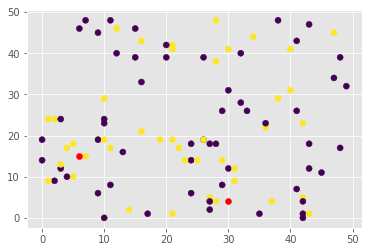

In [41]:
km = kmeans(0, 50, 2, 100, 2)
km.calculateCentroids()

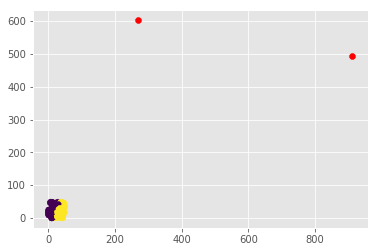

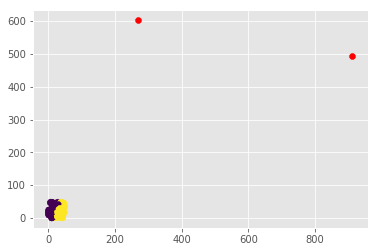

In [42]:

km.center()
km.__draw__()

In [22]:
km.points[:,0]

array([31,  0, 32,  5, 45, 42, 45,  6, 26, 26, 29, 39, 20, 28, 34, 37, 11,
       41, 23,  3, 28,  1, 19,  8, 24, 22, 26, 36, 23, 40, 41, 47, 11, 27,
       34, 15,  3, 29, 26, 41,  6, 38, 28, 36, 43, 30, 34, 20, 27, 40, 39,
       22, 18, 38,  4,  0,  5, 17, 23, 36, 43, 24, 38, 20, 12,  2, 42, 47,
       45,  9,  0,  2, 43,  5, 26, 29, 49, 35,  9,  5, 30, 14, 36, 28,  5,
       18, 49, 25,  6, 39, 35,  2, 31, 25,  9, 44, 35, 37, 43, 27])

In [23]:
km.points

array([[31, 38],
       [ 0, 35],
       [32,  5],
       [ 5, 46],
       [45, 28],
       [42, 41],
       [45,  9],
       [ 6,  3],
       [26, 30],
       [26, 43],
       [29, 12],
       [39,  7],
       [20, 23],
       [28, 23],
       [34, 28],
       [37,  1],
       [11, 15],
       [41, 36],
       [23, 18],
       [ 3, 18],
       [28,  6],
       [ 1,  7],
       [19, 45],
       [ 8, 42],
       [24, 20],
       [22, 36],
       [26, 28],
       [36, 45],
       [23, 43],
       [40,  9],
       [41, 14],
       [47, 26],
       [11, 48],
       [27, 25],
       [34, 23],
       [15, 17],
       [ 3, 23],
       [29, 10],
       [26,  2],
       [41, 48],
       [ 6,  2],
       [38, 14],
       [28, 32],
       [36,  8],
       [43, 40],
       [30, 37],
       [34, 40],
       [20, 15],
       [27, 25],
       [40, 43],
       [39, 17],
       [22, 40],
       [18, 21],
       [38, 10],
       [ 4, 41],
       [ 0, 47],
       [ 5, 10],
       [17, 20],
       [23, 10

In [12]:
km.clusters

array([[24, 28],
       [16, 36]])

In [13]:
km.clusters.shape

(2, 2)

In [18]:
km.family

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.])

In [15]:
km.family.shape

(100,)

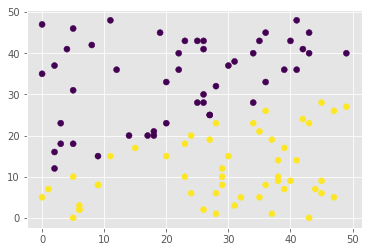

In [28]:
plt.figure(1)
plt.scatter(km.points[:,0], km.points[:,1], c=km.family)

In [27]:
km.clusters


array([[37, 41],
       [47, 19]])